### **Basic Requirement**

In [1]:
# let's start with cloning YOLOv5
'''
git clone https://github.com/ultralytics/yolov5
cd yolov5
pip install -r requirements.txt
run them on terminal
'''

### **Imports**

In [1]:
import torch
from torchvision import models, transforms, datasets
from matplotlib import pyplot as plt
import  numpy as np
import cv2

In [2]:
# to download yolov5x6.pt weights
torch.hub.load('ultralytics/yolov5', 'yolov5x6')

Using cache found in C:\Users\Abu Ubaida/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-1 Python-3.10.4 torch-1.12.1+cpu CPU



  0%|          | 0.00/24.8M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s6 summary: 280 layers, 12612508 parameters, 0 gradients
Adding AutoShape... 


### **Training**

In [2]:
# first I got experienced in colab notebook to get better understanding of hyperparameters
# https://colab.research.google.com/drive/10DQhnyQytcP-0FT2cSnA6bohTZnoTbnh?usp=sharing

In [1]:
# # run it with clearml or in the terminal
# !cd yolov5 && python train.py --img 640 --batch 34 --epoch 100 --data dataset.yml --weights yolov5x6.pt

# 9th attempt 
# !python train.py --img 440 --batch 64 --epoch 1 --data dataset.yml --weights yolov5x6.pt

# from scratch 
!python train.py --data dataset.yml --weights ' ' --cfg yolov5x.yaml --img 640 --epoch 1 

# now after 21, let's do big jump
!python train.py --data dataset.yml --weights runs/train/exp21/weights/best.pt --img 228 --epoch 1 --batch 32 

# let's do 50 more
!python train.py --data dataset.yml --weights runs/train/exp26/weights/best.pt --img 228 --epoch 1 --batch 32 

# let's do 5 more
!python train.py --data dataset.yml --weights runs/train/exp28/weights/best.pt --img 228 --epoch 5 --batch 32

# 12 epochs in day
!python train.py --data dataset.yml --weights runs/train/exp28/weights/best.pt --img 228 --epoch 12 --batch 32 
# 17 epochs in a night
!python train.py --data dataset.yml --weights runs/train/exp30/weights/best.pt --img 228 --epoch 18 --batch 32

# now to reduce the loss I will add some tunning
# in --hyp scratc-high, I added lr1 = 0.001, momentum = 0.999 same on other let's see 
!python train.py --data dataset.yml --weights runs/train/exp33/weights/best.pt --img 228 --epoch 18 --batch 32 --hyp hyp.scratch-high.yaml --evolve

# now I have train 40 epochs starting from the previous weights and downloaded weight by running on colab 
!python train.py --data dataset.yml --weights best.pt --img 228 --epoch 18 --batch 32 

### **Checking model**

In [18]:
import torch
from torchvision import models, transforms, datasets
from matplotlib import pyplot as plt
import  numpy as np
import cv2

In [47]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path="yolov5/best.pt")  
model.eval()

Using cache found in C:\Users\Abu Ubaida/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-10-22 Python-3.10.4 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 322 layers, 86456032 parameters, 0 gradients, 204.7 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

### **On Single Image**

In [20]:
img = r'C:\Product\FS\Models\Data\train\images\14b424e9235fd5dc96de90b75ddd271a.jpg'

In [21]:
results = model(img)
print(results)

image 1/1: 1200x1200 2 refrigerators
Speed: 1740.9ms pre-process, 6938.5ms inference, 61.7ms NMS per image at shape (1, 3, 640, 640)


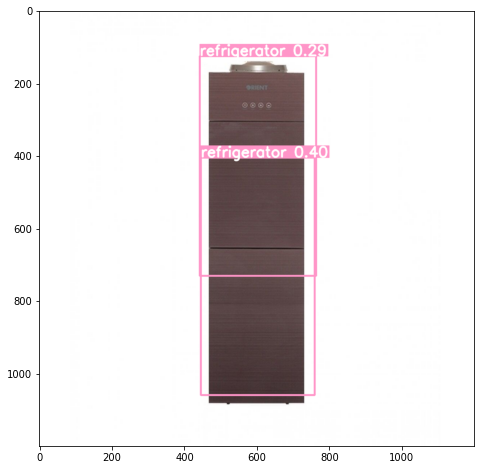

In [22]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.imshow(np.squeeze(results.render()))
plt.show()

### **On Multiple Objects**

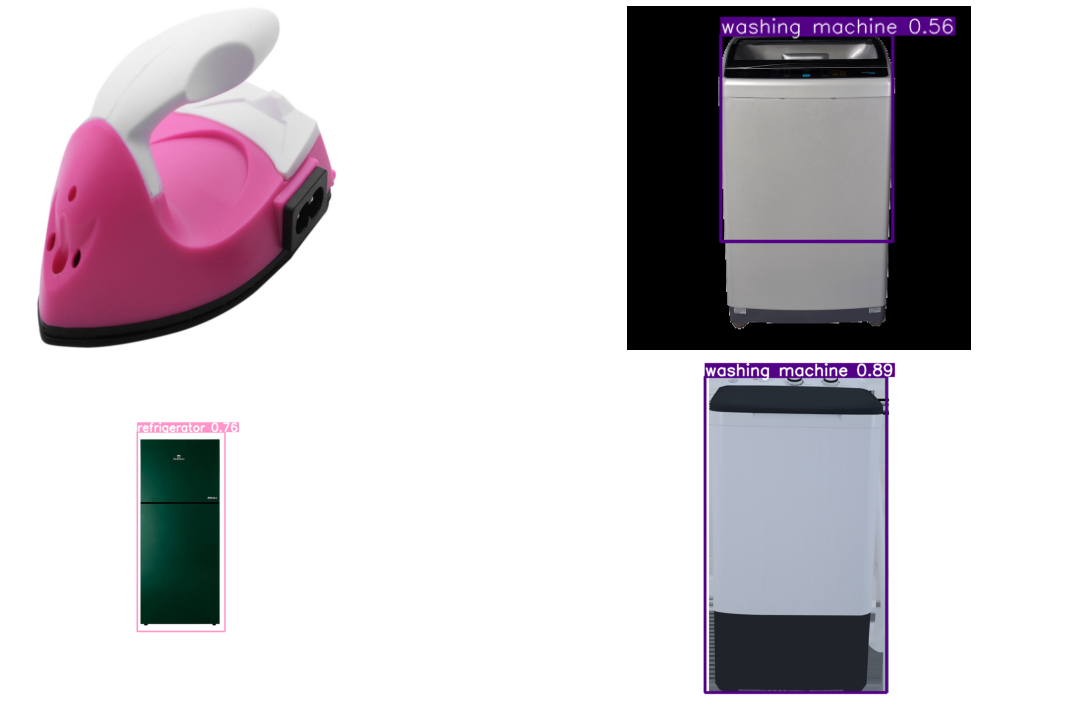

In [12]:
import glob
import os
from random import sample 
import matplotlib.pyplot as plt
import numpy as np

# os.getcwd()
path=r'C:/Product/FS/Models/Data/val'    
ls = [img for img in glob.glob(path+"/images/*")]
# len(ls)

figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for i in range(4):
    img = np.random.randint(1, 200)
    image = ls[img]
    result = model(image)

    ax.ravel()[i].imshow(np.squeeze(result.render()))
    ax.ravel()[i].set_axis_off()
plt.tight_layout()
plt.show()    

### **let's get frames**

In [23]:
# Imports 
from msilib.schema import Directory
import cv2
import matplotlib.pyplot as plt
import time
import os 
import cv2, pafy




class Get_frames:
    def __init__(self, video_path=None, yt_video_link=None, mk_dir_name='xyz', after_each_sec=1):
        self.vid_path = video_path
        self.mk_dir_name= mk_dir_name
        self.second = after_each_sec
        self.link = yt_video_link

    def mk_dir(self):
        curr_dir = os.getcwd()
        _ = os.makedirs(str(self.mk_dir_name), exist_ok=True)
        path = os.path.join(curr_dir, str(self.mk_dir_name)) 
        return path
    
    def get_frames(self):
        if self.link != None:
            url   = str(self.link)
            v = pafy.new(url)
            best  = v.getbest(preftype='mp4')
            # capture frames without downloading
            video = cv2.VideoCapture(best.url)
        else:
            video = cv2.VideoCapture(self.vid_path)

        fps = video.get(cv2.CAP_PROP_FPS) 
        path = self.mk_dir()

        # to get frame of specific-sec
        frame_af_sec = fps*self.second 
        i=0 
        while(video.isOpened()):
            # want to get each frame after 1 second 
            frame_id = fps 
            # video will be set to e.g. 30sec 
            video.set(cv2.CAP_PROP_POS_FRAMES, frame_id) 
            # read that frame, if not end
            ret, frame = video.read()
            # ret, when it reach to end, gets False
            if ret == False:
                break
            # write image on the current folder with frame id
            cv2.imwrite(f"{path}/{frame_id}.jpg", frame)
            i+=1
            fps+=frame_af_sec
            # time.sleep(5)
        video.release()


if __name__ == "__main__":
    gf = Get_frames(yt_video_link='https://www.youtube.com/watch?v=jhE1lNUY8Mw&ab_channel=Nadiakakitchen', mk_dir_name='frames', after_each_sec=5)
    gf.get_frames()

#### **Next Step** 
----
- Now I will download all pretrained models and will run prediction on all of them, after all I will take out the mode which will be the overall prediction about that frame!

## Models

- Pretrained Model

- We save pytorch model like this:
1.           torch.save({'epoch':epoch,
2.           'loss': loss,
3.           'model_state_dict':model.state_dict(), 
4.           'optim_state_dict':optim.state_dict()}, "path/to/location.pt')
- we load like this:
1.        state_dict = torch.load(f="path/to/location.pt", map_location=device)
2.        epoch = state_dict['epoch']
3.        loss = state_dict['loss']
4.        model.load_state_dict(state_dict['model_state_dict'])
5.        optim.load_state_dict(state_dict['optim_state_dict'])

- We save Yolo model like this 
1.      torch.save(model.state_dict(), 'C:/Product/FS/Models/YOLO/train_model.pt')

- we load like this:
1.      model = torch.hub.load('ultralytics/yolov5', 'custom', path='path/.pt') 

In [49]:
pre_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/yolov5x6.pt')  
model = torch.hub.load('ultralytics/yolov5', 'custom', path="yolov5/best.pt")  
# 

Using cache found in C:\Users\Abu Ubaida/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-10-22 Python-3.10.4 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 
Using cache found in C:\Users\Abu Ubaida/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-10-22 Python-3.10.4 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 322 layers, 86456032 parameters, 0 gradients, 204.7 GFLOPs
Adding AutoShape... 


In [50]:
torch.save(pre_model, 'C:/Product/FS/Models/YOLO/models/pre_tra_model.pt')



- Trained Model

In [51]:
torch.save(model, 'C:/Product/FS/Models/YOLO/models/Train_model.pt')

#### **let's predict Objects in video**

In [53]:

model1= torch.load('models/train_model.pt')
model2= torch.load('models/pre_tra_model.pt')

#### **Technique to get predicted values**

In [54]:
img2 = r'C:\Product\FS\Models\YOLO\frames\30030.0.jpg'

output = str(model1(img2))
print(output)
# print(output)
text = output.split('\n')[0]
stg = text.split(' ')[3:]
text = ' '.join(stg)
# print(text)
t  = text.split(',')
print(t)
di = {}
for i in range(len(t)):
    t[i] = t[i].strip()
    ls = t[i].split(' ')
    print(ls)
    di[t[i].split(' ')[1]] = t[i].split(' ')[0]
print(di)

image 1/1: 720x1280 3 sofas, 1 lamp
Speed: 25.9ms pre-process, 2066.9ms inference, 7.0ms NMS per image at shape (1, 3, 384, 640)
['3 sofas', ' 1 lamp']
['3', 'sofas']
['1', 'lamp']
{'sofas': '3', 'lamp': '1'}


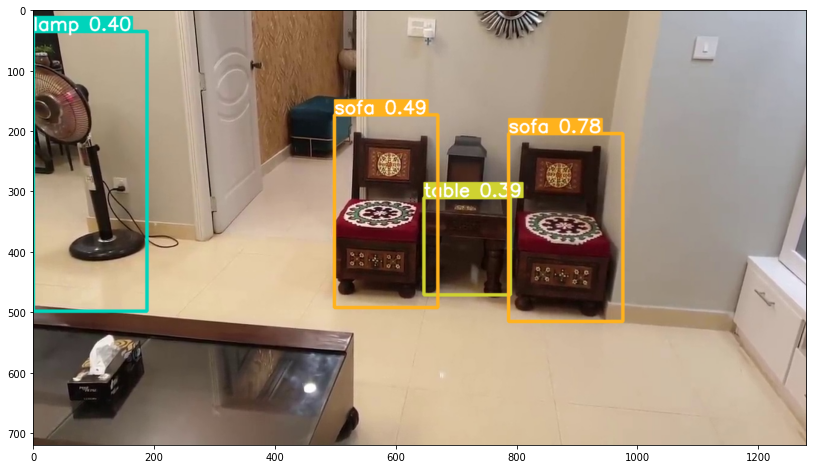

In [176]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.imshow(np.squeeze(result2.render()))
plt.show()



In [99]:
# model will take pic 
# will give all instances as a dic 

def detect(img):
    output= model1(img)
    # some techniques to get Predicted values
    text1 = str(output).split('\n')[0]
    text2 = text1.split(' ')[3:]
    text3 = ' '.join(text2)
    text4 = text3.split(',')
    details = {}
    for i in range(len(text4)):
        text4[i] = text4[i].strip()
        ls = text4[i].split(' ')
        details[text4[i].split(' ')[1]] = int(t[i].split(' ')[0])
    print(details)

In [100]:
img = r'C:\Product\FS\Models\YOLO\frames\29880.0.jpg'
detect(img)

['2', 'sofas']
['1', 'table']
{'sofas': 3, 'table': 1}


In [56]:
from glob import glob
import torch
import torch
from torchvision import models, transforms, datasets
from matplotlib import pyplot as plt
import  numpy as np
import cv2


class Detected_objs:
    def __init__(self, images_fold_path=None, models_path=None):
        self.models = models_path
        self.dic = {}
        self.path = images_fold_path
        self.p = self.path.replace("\\", '/') 
        self.images_list = glob(self.p+'/*')
        

    def detect(self, mod):
        # path = mod
        # model = torch.hub.load('ultralytics/yolov5', 'custom', path=mod, force_reload=True)
        model = torch.load(mod)
        model_info = []
        for img in self.images_list:
            output = model(img)
            # some techniques to get Predicted values
            text1 = str(output).split('\n')[0]
            text2 = text1.split(' ')[3:]
            text3 = ' '.join(text2)
            text4 = text3.split(',')
            details = {}
            for i in range(len(text4)):
                text4[i] = text4[i].strip()
                # ls = text4[i].split(' ')
                details[text4[i].split(' ')[1]] = text4[i].split(' ')[0]
            # add all dic to the instance var
            model_info.append(details)
        return model_info

    def engine(self):
        path= self.models.replace("\\", '/') 
        model_lists = glob(path+'/*')
        for mod in model_lists:
            info = self.detect(mod)
            self.dic['model1'] = info
        return self.dic 


if __name__ == '__main__':
    obj = Detected_objs(images_fold_path=r'C:\Product\FS\Models\YOLO\frames', models_path = r'C:\Product\FS\Models\YOLO\models' )
    a = obj.engine()
    print(a)

{'model1': [{'detections)': '(no'}, {'jhumar': '1'}, {'jhumar': '1'}, {'detections)': '(no'}, {'detections)': '(no'}, {'Wardrobe': '1'}, {'detections)': '(no'}, {'detections)': '(no'}, {'jhumar': '1'}, {'jhumar': '1', 'lamp': '1'}, {'Bed': '1', 'washing': '1', 'jhumar': '1'}, {'detections)': '(no'}, {'table': '1', 'jhumar': '1'}, {'detections)': '(no'}, {'detections)': '(no'}, {'wifi': '1', 'Wardrobe': '1'}, {'detections)': '(no'}, {'tv': '1', 'refrigerator': '1'}, {'washing': '1', 'jhumar': '1'}, {'jhumar': '1'}, {'Bed': '1', 'sofas': '2', 'jhumar': '1'}, {'sofas': '3'}, {'washing': '1', 'sofas': '3', 'table': '1'}, {'washing': '1', 'sofas': '3', 'table': '1'}, {'Bed': '1', 'washing': '1', 'sofas': '2', 'table': '1'}, {'chair': '1'}, {'Bed': '1', 'chair': '1'}, {'wifi': '1'}, {'sofas': '2'}, {'sofa': '1', 'table': '1'}, {'Bed': '1', 'sofa': '1'}, {'detections)': '(no'}, {'sewing': '1'}, {'lamp': '1'}, {'detections)': '(no'}, {'detections)': '(no'}, {'sofas': '2', 'lamp': '1'}, {'sofas